#📌 Extracción

In [ ]:
# Importaciones de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import requests
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    data = json.loads(response.text)

    print("Data extracted successfully!")

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")

try:
    df = pd.DataFrame(data)
    print("DataFrame created successfully!")

except Exception as e:
    print(f"Error creating DataFrame: {e}")


Data extracted successfully!
DataFrame created successfully!


In [ ]:
print(df)

      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

#🔧 Transformación

In [ ]:
import pandas as pd # Make sure you have pandas imported

def load_and_clean_data(filepath):
    # 1. Load the data
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file was not found at the path: {filepath}")
        return None # Return None or raise an error if the file isn't found
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

    # 2. Start the cleaning process on a copy
    df_clean = df.copy()

    # 3. Basic Cleaning (Mapping values)
    # Check if columns exist before mapping to avoid KeyError
    if 'Churn' in df_clean.columns:
        df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

    # Assuming SeniorCitizen is an integer (0/1) that needs mapping to 'No'/'Yes'
    if 'SeniorCitizen' in df_clean.columns and df_clean['SeniorCitizen'].dtype in ['int64', 'int32']:
        df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

    # 4. Drop unnecessary columns
    cols_to_drop = ['customerID']
    if 'Unnamed: 0' in df_clean.columns:
        cols_to_drop.append('Unnamed: 0')

    # Use errors='ignore' to prevent errors if a column isn't found
    df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')

    return df_clean


In [ ]:
import pandas as pd
import requests
import json # You'll need this if you're using json.loads()

# --- Load Data and Normalize ---
# 1. Fetch the JSON data from the URL
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status() # Raises an HTTPError for bad responses (4xx or 5xx)
    data = json.loads(response.text) # Parse the JSON content
    df = pd.DataFrame(data) # Create DataFrame from the loaded JSON data
except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL: {e}")
    exit() # Exit if data cannot be fetched
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    exit() # Exit if JSON is invalid

# Normalizar columnas anidadas
# Ensure these columns exist in your DataFrame before normalizing
try:
    customer_df = pd.json_normalize(df['customer'])
    phone_df = pd.json_normalize(df['phone'])
    internet_df = pd.json_normalize(df['internet'])
    account_df = pd.json_normalize(df['account'])

    # Concatenar los DataFrames normalizados con el original
    # Primero, se eliminan las columnas originales anidadas
    df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

    # Luego, se concatenan las columnas normalizadas
    df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

    print(df.head()) # Display the head of the processed DataFrame

except KeyError as e:
    print(f"Error: La columna '{e}' no se encontró en el DataFrame. Asegúrate de que las columnas 'customer', 'phone', 'internet', 'account' existen en el JSON anidado.")
except Exception as e:
    print(f"Ocurrió un error durante la normalización/concatenación: {e}")

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

#📊 Carga y análisis

In [ ]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


--- Primeras filas del DataFrame limpio y normalizado ---
| customerID   | Churn   | customer.gender   | customer.SeniorCitizen   | customer.Partner   | customer.Dependents   | customer.tenure   | phone.PhoneService   | phone.MultipleLines   | internet.InternetService   | internet.OnlineSecurity   | internet.OnlineBackup   | internet.DeviceProtection   | internet.TechSupport   | internet.StreamingTV   | internet.StreamingMovies   | account.Contract   | account.PaperlessBilling   | account.PaymentMethod   | account.Charges.Monthly   | account.Charges.Total   | Churn_numeric   |
|:-------------|:--------|:------------------|:-------------------------|:-------------------|:----------------------|:------------------|:---------------------|:----------------------|:---------------------------|:--------------------------|:------------------------|:----------------------------|:-----------------------|:-----------------------|:---------------------------|:-------------------|:-----------------

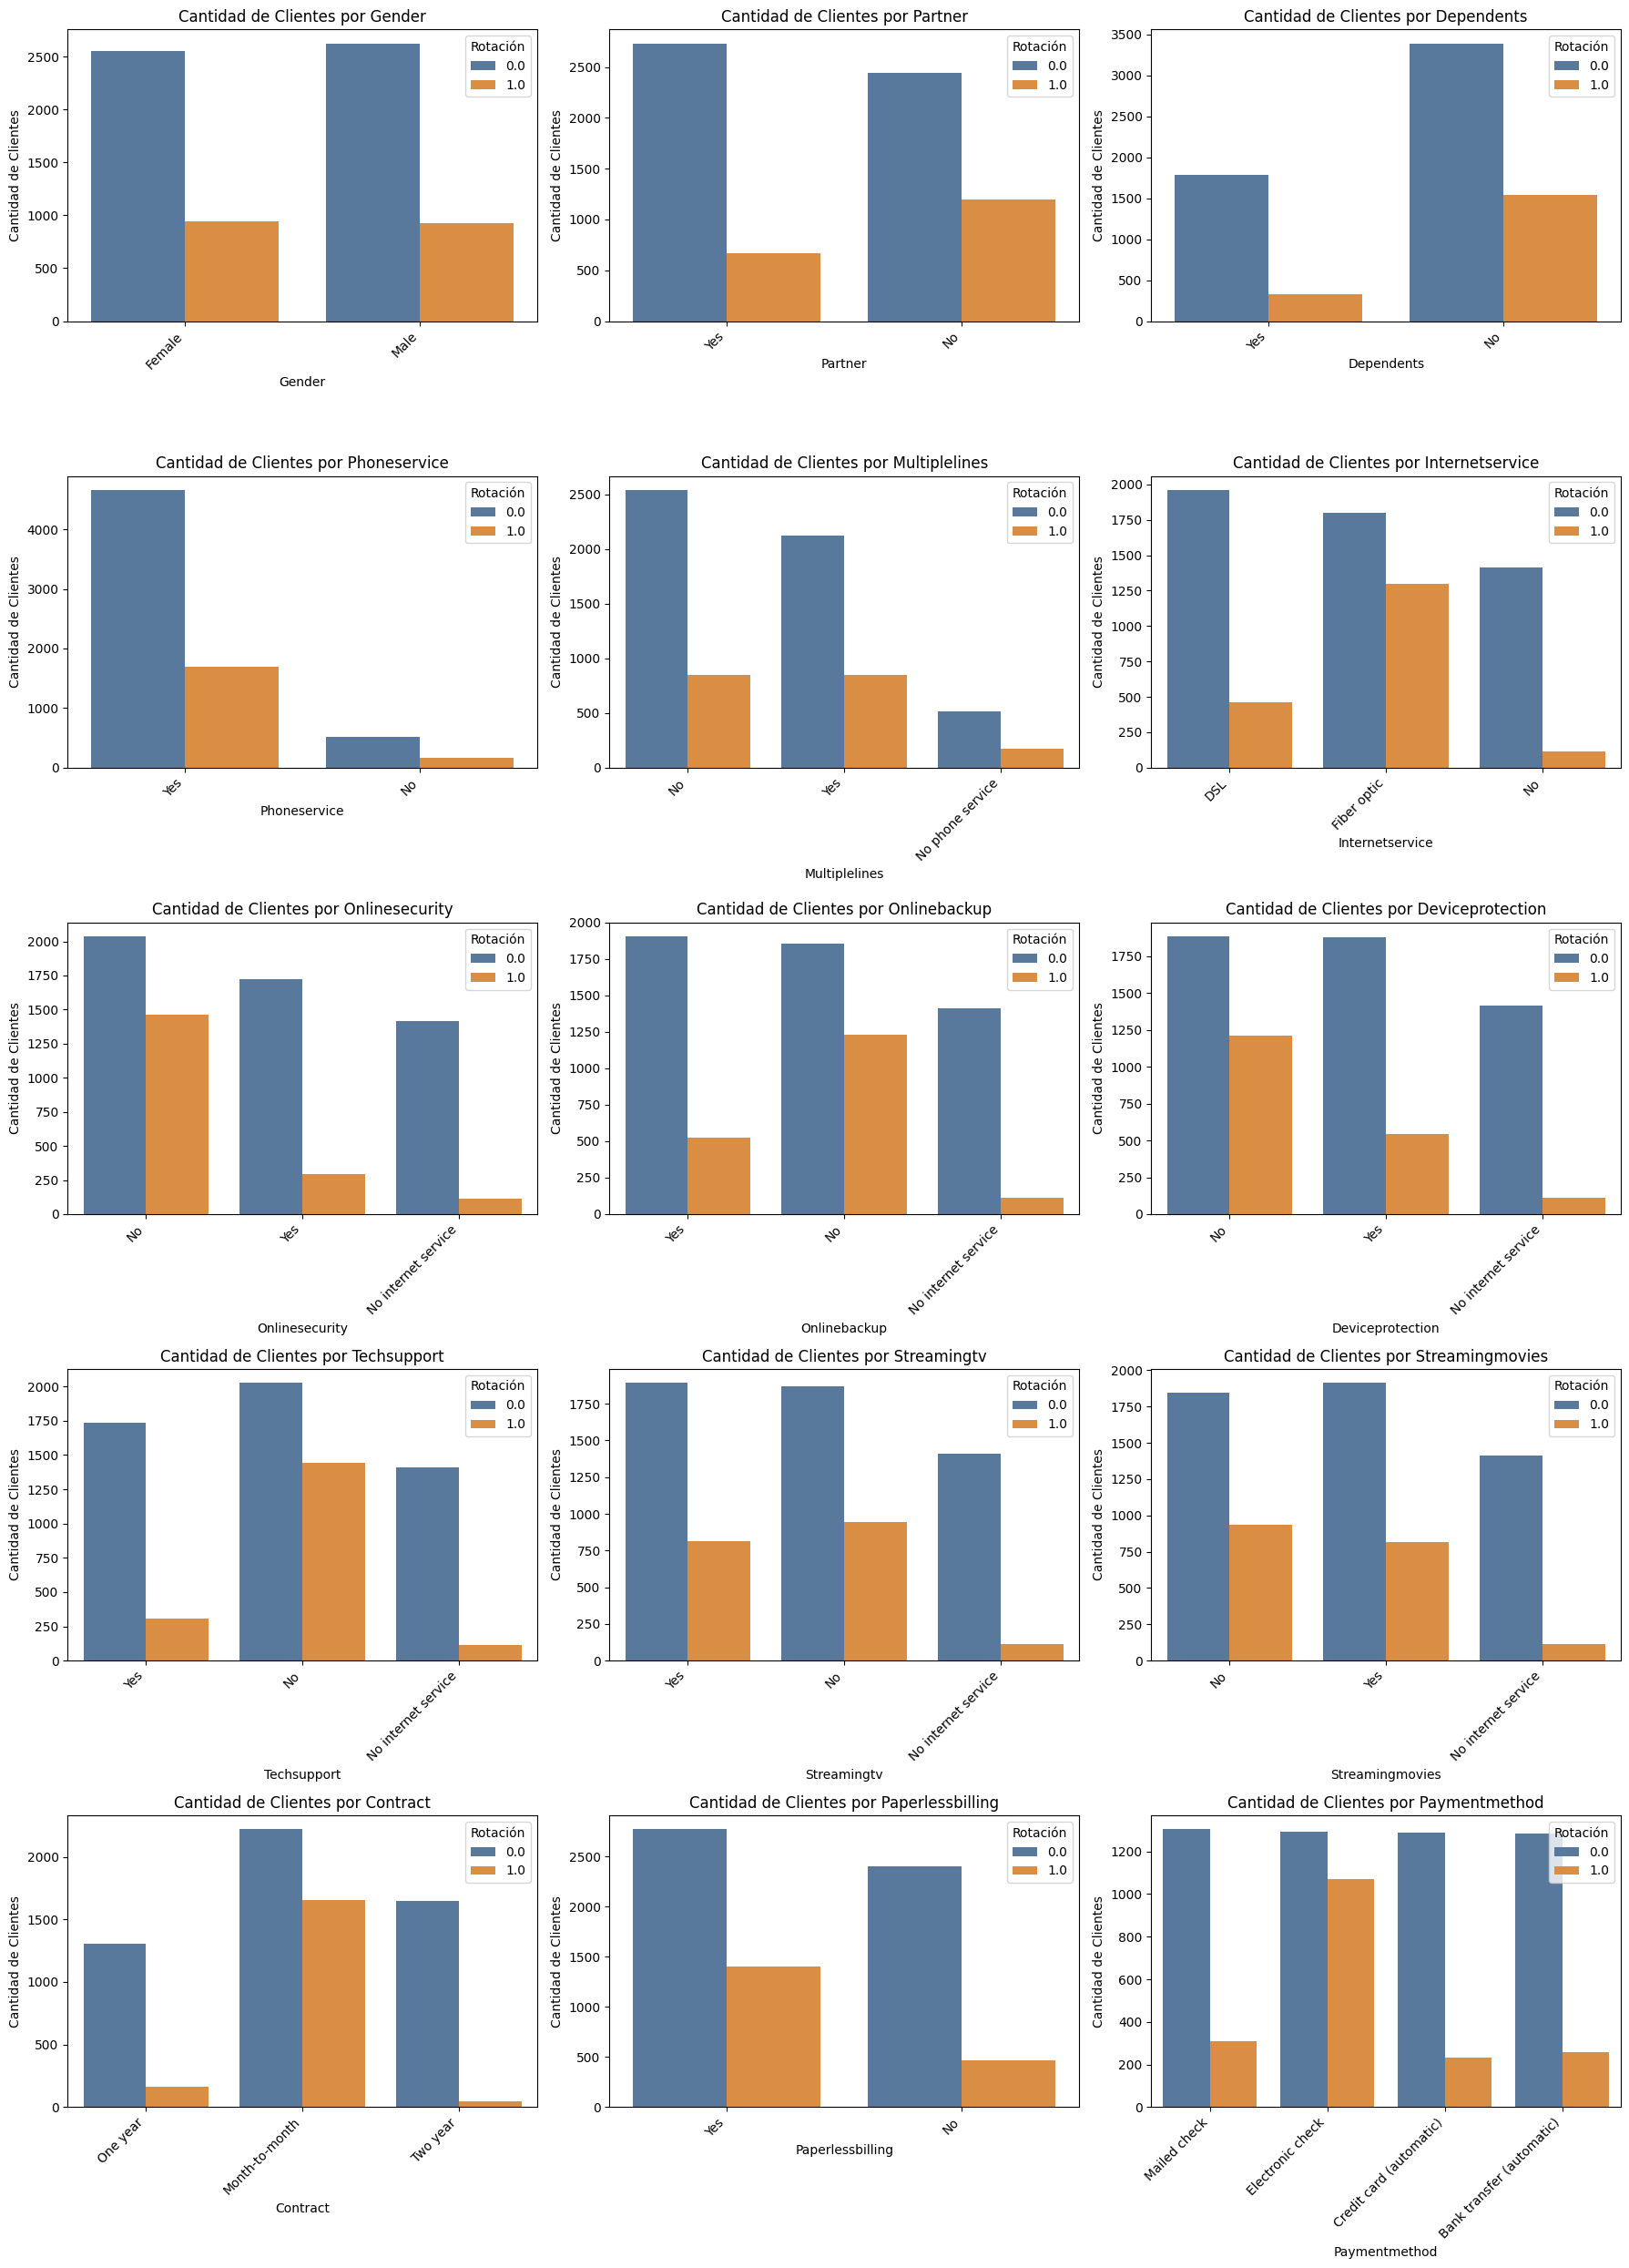


--- Gráficos de Distribución por Variables Categóricas y Churn ---


In [7]:
import numpy as np
from scipy.stats import chi2_contingency # Para cramers_v
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json

# --- 1. Definir URL y Carga de Datos con Manejo de Errores ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status() # Lanza un HTTPError para malas respuestas (4xx o 5xx)
    data = json.loads(response.text) # Parsear el contenido JSON
    df_raw = pd.DataFrame(data) # Usamos df_raw para el DataFrame inicial
except requests.exceptions.RequestException as e:
    print(f"Error al obtener datos de la URL: {e}")
    # Puedes salir o manejar el error de otra manera si no se pueden obtener los datos
    exit()
except json.JSONDecodeError as e:
    print(f"Error al decodificar JSON: {e}")
    # Es posible que el JSON de la URL no esté perfectamente formado para json.loads directo
    # Considera una carga más robusta si este error persiste para el JSON completo.
    exit()

# --- 2. Normalizar Columnas Anidadas de forma robusta ---
df_clean = df_raw.copy()
nested_cols = ['customer', 'phone', 'internet', 'account']

for col in nested_cols:
    if col in df_clean.columns and not df_clean[col].isnull().all():
        # Filtrar solo los elementos que son diccionarios válidos
        valid_dicts = df_clean[col].apply(lambda x: isinstance(x, dict))

        if valid_dicts.any():
            # Normalizar solo los diccionarios válidos
            normalized_part = pd.json_normalize(df_clean.loc[valid_dicts, col])

            # Renombrar columnas para estandarizar (ej. español a inglés si se prefiere)
            # Aplicar a las columnas relevantes después de normalizar
            normalized_part = normalized_part.rename(columns={
                'duración': 'tenure',
                'Servicio Telefónico': 'PhoneService',
                'Líneas Múltiples': 'MultipleLines',
                'Servicio de Internet': 'InternetService',
                'Seguridad en Línea': 'OnlineSecurity',
                'Copia de Seguridad en Línea': 'OnlineBackup',
                'Protección del Dispositivo': 'DeviceProtection',
                'Soporte Técnico': 'TechSupport',
                'Contrato': 'Contract',
                'Facturación Electrónica': 'PaperlessBilling',
                'Facturación sin papel': 'PaperlessBilling', # Otra posible inconsistencia
                'Método de Pago': 'PaymentMethod',
                'ID del cliente': 'customerID', # Si aparece aquí
                'género': 'gender',
                'Ciudadano mayor': 'SeniorCitizen',
                'Pareja': 'Partner',
                'Dependientes': 'Dependents',
                'Cargos.Mensual': 'Cargos.Mensual', # Mantener así si está bien
                'Cargos.Total': 'Cargos.Total'    # Mantener así si está bien
            })

            # Añadir prefijo para evitar colisiones con columnas de otros anidados
            normalized_part.columns = [f'{col}.{sub_col}' if sub_col not in ['Cargos.Mensual', 'Cargos.Total'] else sub_col for sub_col in normalized_part.columns]

            # Unir al DataFrame principal. Usar el índice de df_clean para asegurar alineación.
            df_clean = df_clean.drop(columns=[col]) # Eliminar la columna anidada original
            df_clean = df_clean.join(normalized_part)
        else:
            df_clean = df_clean.drop(columns=[col]) # Si no hay diccionarios válidos, simplemente eliminar

# Post-normalización: Limpieza y unificación de columnas
# Unificar 'customer.tenure' y 'customer.duración' si existieran ambas después de la normalización
if 'customer.duración' in df_clean.columns and 'customer.tenure' in df_clean.columns:
    df_clean['customer.tenure'] = df_clean['customer.tenure'].fillna(df_clean['customer.duración'])
    df_clean = df_clean.drop(columns=['customer.duración'])
elif 'customer.duración' in df_clean.columns and 'customer.tenure' not in df_clean.columns:
    df_clean = df_clean.rename(columns={'customer.duración': 'customer.tenure'})

# Mapear Churn a numérico (asegurando 'Sí' y 'No' y posibles espacios extra)
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].replace({'No ': 'No'}) # Limpiar posibles espacios
    df_clean['Churn_numeric'] = df_clean['Churn'].map({'Yes': 1, 'Sí': 1, 'No': 0})
    # Si Churn_numeric tiene NaN después del mapeo, puedes rellenarlos o eliminar esas filas
    df_clean['Churn_numeric'] = pd.to_numeric(df_clean['Churn_numeric'], errors='coerce')
    df_clean = df_clean.dropna(subset=['Churn_numeric']) # Eliminar filas con Churn desconocido

# Convertir columnas numéricas a float (especialmente cargos.total que puede tener espacios)
for col in ['account.Cargos.Mensual', 'account.Cargos.Total', 'customer.tenure', 'customer.SeniorCitizen']:
    if col in df_clean.columns:
        # Reemplazar posibles espacios en blanco en 'Total' con NaN antes de convertir a numérico
        if col == 'account.Cargos.Total':
            df_clean[col] = df_clean[col].replace(' ', np.nan)
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        # Puedes decidir rellenar NaNs o eliminarlos después de la conversión
        df_clean = df_clean.dropna(subset=[col])


print("--- Primeras filas del DataFrame limpio y normalizado ---")
print(df_clean.head().to_markdown(index=False, numalign="left", stralign="left"))

# --- Corrección de los errores KeyError ---

# 1. 'meses_de_contrato'
# Después de la normalización, 'duración' se convierte en 'customer.tenure'.
# No hay una columna 'meses_de_contrato' si el mapeo ya se hizo.
# Verificamos si 'customer.tenure' existe y si no, no intentamos convertirla.
if 'customer.tenure' in df_clean.columns:
    df_clean['customer.tenure'] = df_clean['customer.tenure'].astype(np.float64)
else:
    print("Advertencia: 'customer.tenure' no se encontró en el DataFrame.")

# 2. 'cancelacion'
# Tu columna para el churn (abandono) se mapea a 'Churn' y luego a 'Churn_numeric'.
# Debemos usar 'Churn' o 'Churn_numeric' para agrupar, no 'cancelacion'.
# Asumiendo que quieres usar la columna original 'Churn' para las etiquetas de los gráficos
# y 'Churn_numeric' para el hue si es necesario.

# 3. Nombres de columnas en `variables_categoricas`
# Debes usar los nombres de columnas que resultan después de la normalización.
# Let's inspect df_clean.columns to get the correct names.
print("\n--- Columnas disponibles en df_clean ---")
print(df_clean.columns.tolist())

# Actualiza esta lista basándote en la salida de df_clean.columns.tolist()
# A continuación, una suposición basada en tu mapeo:
variables_categoricas_correctas = [
    'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
    'account.PaperlessBilling', 'account.PaymentMethod'
]

# Asegúrate de que solo las columnas que realmente existen se incluyan
variables_categoricas_existentes = [col for col in variables_categoricas_correctas if col in df_clean.columns]
if not variables_categoricas_existentes:
    print("No se encontraron variables categóricas para graficar. Verifique los nombres de las columnas después de la normalización.")
    exit() # Salir si no hay columnas para graficar

colores = ['#4e79a7', '#f28e2b'] # Permanecen, Abandonan

# --- Funciones de Análisis y Visualización ---
def cramers_v(x, y):
    """Calcula el coeficiente V de Cramer para variables categóricas"""
    idx = x.notna() & y.notna()
    x = x[idx]
    y = y[idx]

    if x.empty or y.empty:
        return np.nan # No se puede calcular si no hay datos

    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.empty or confusion_matrix.shape[0] == 0 or confusion_matrix.shape[1] == 0:
        return 0.0 # No variabilidad

    # Manejar el caso donde una variable tiene solo 1 categoría única
    if min(confusion_matrix.shape) == 1:
        return 0.0 # V de Cramer no está bien definido o es 0

    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    denominator = min((kcorr - 1), (rcorr - 1))
    if denominator == 0: # Evitar división por cero
        return 0.0

    return np.sqrt(phi2corr / denominator)

def plot_distributions(df_to_plot, columns, hue='Churn_numeric', max_cols=3): # hue ahora por defecto es 'Churn_numeric'
    """Visualiza distribuciones de variables categóricas"""
    n_plots = len(columns)
    if n_plots == 0:
        print("No hay columnas para plotear.")
        return

    n_rows = (n_plots + max_cols - 1) // max_cols

    plt.figure(figsize=(18, 5 * n_rows))
    for i, col in enumerate(columns, 1):
        if col in df_to_plot.columns and hue in df_to_plot.columns: # Asegurarse que ambas columnas existen
            plt.subplot(n_rows, max_cols, i)
            # Usamos 'Churn' para las etiquetas si existe, de lo contrario usamos 'Churn_numeric'
            # para el hue, pero para las etiquetas en la leyenda, usaremos un mapeo si hue es numérico
            sns.countplot(data=df_to_plot, x=col, hue=hue, palette=colores)
            plt.title(f'Cantidad de Clientes por {col.replace("customer.", "").replace("phone.", "").replace("internet.", "").replace("account.", "").replace("_", " ").title()}')
            plt.ylabel('Cantidad de Clientes')
            plt.xlabel(col.replace("customer.", "").replace("phone.", "").replace("internet.", "").replace("account.", "").replace("_", " ").title())
            # Ajustar la leyenda para que diga "Permanecen" y "Abandonan"
            handles, labels = plt.gca().get_legend_handles_labels()
            # Asumiendo que 0 es 'No' (Permanecen) y 1 es 'Sí' (Abandonan)
            new_labels = ['Permanecen', 'Abandonan'] if '0' in labels or '1' in labels else labels
            plt.legend(handles, new_labels, title='Rotación')
            plt.xticks(rotation=45, ha='right')
        else:
            print(f"Advertencia: La columna '{col}' o 'Churn_numeric' no se encontró en el DataFrame para plotear.")
    plt.tight_layout()
    plt.show()

# --- 3. Llamar a las funciones con el DataFrame correctamente preparado ---

# Identificar columnas categóricas finales (excluyendo customerID, Churn y Churn_numeric)
# Usaremos las 'variables_categoricas_existentes' que hemos construido.
# Asegurarse de que 'Churn_numeric' exista para el hue
if 'Churn_numeric' not in df_clean.columns:
    print("La columna 'Churn_numeric' no se encontró. No se pueden generar gráficos con 'hue' de rotación.")
else:
    print("\n--- Generando Gráficos de Distribución (visibles en un entorno compatible con gráficos) ---")
    plot_distributions(df_clean, variables_categoricas_existentes, hue='Churn_numeric')

# Código para tus gráficos específicos con subtítulos en español
# Esto ya está manejado dentro de la `plot_distributions` función actualizada.

print("\n--- Gráficos de Distribución por Variables Categóricas y Churn ---")
# El loop para generar los gráficos ya usa las variables_categoricas_existentes
# y la función plot_distributions está diseñada para poner los títulos en español.

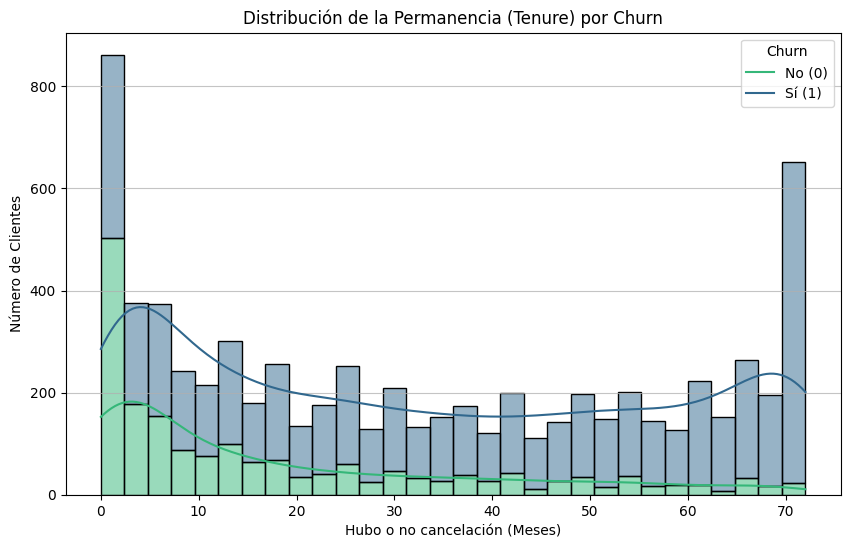

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json

# --- 1. Definir URL y Carga de Datos con Manejo de Errores ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status() # Lanza un HTTPError para malas respuestas (4xx o 5xx)
    data = json.loads(response.text) # Parsear el contenido JSON
    df_raw = pd.DataFrame(data) # Usamos df_raw para el DataFrame inicial
except requests.exceptions.RequestException as e:
    print(f"Error al obtener datos de la URL: {e}")
    # En un script real, aquí podrías querer registrar el error y salir.
    exit() # Salir si los datos no se pueden obtener
except json.JSONDecodeError as e:
    print(f"Error al decodificar JSON: {e}")
    # Salir si el JSON es inválido
    exit()

# --- 2. Normalizar Columnas Anidadas de forma robusta y limpiar ---
df_clean = df_raw.copy()
nested_cols = ['customer', 'phone', 'internet', 'account']

for col in nested_cols:
    if col in df_clean.columns and not df_clean[col].isnull().all():
        # Filtrar solo los elementos que son diccionarios válidos
        valid_dicts = df_clean[col].apply(lambda x: isinstance(x, dict))

        if valid_dicts.any():
            normalized_part = pd.json_normalize(df_clean.loc[valid_dicts, col])

            # Renombrar columnas para estandarizar español a inglés o mantener consistente
            normalized_part = normalized_part.rename(columns={
                'duración': 'tenure',
                'Servicio Telefónico': 'PhoneService',
                'Líneas Múltiples': 'MultipleLines',
                'Servicio de Internet': 'InternetService',
                'Seguridad en Línea': 'OnlineSecurity',
                'Copia de Seguridad en Línea': 'OnlineBackup',
                'Protección del Dispositivo': 'DeviceProtection',
                'Soporte Técnico': 'TechSupport',
                'Contrato': 'Contract',
                'Facturación Electrónica': 'PaperlessBilling',
                'Facturación sin papel': 'PaperlessBilling', # Otra posible inconsistencia
                'Método de Pago': 'PaymentMethod',
                'ID del cliente': 'customerID', # Si aparece aquí
                'género': 'gender',
                'Ciudadano mayor': 'SeniorCitizen',
                'Pareja': 'Partner',
                'Dependientes': 'Dependents',
                'Cargos.Mensual': 'Cargos.Mensual', # Asegurar que mantenga el nombre correcto si es dict anidado
                'Cargos.Total': 'Cargos.Total'     # Asegurar que mantenga el nombre correcto si es dict anidado
            })

            # Añadir prefijo para evitar colisiones entre columnas de diferentes anidados
            # Excluir 'Cargos.Mensual' y 'Cargos.Total' de prefijo si ya tienen el prefijo de 'account.'
            normalized_part.columns = [
                f'{col}.{sub_col}' if not (sub_col.startswith('Cargos.') or sub_col in ['customerID']) else sub_col
                for sub_col in normalized_part.columns
            ]

            # Unir al DataFrame principal. Usar el índice de df_clean para asegurar alineación.
            df_clean = df_clean.drop(columns=[col]) # Eliminar la columna anidada original
            df_clean = df_clean.join(normalized_part)
        else:
            df_clean = df_clean.drop(columns=[col]) # Si no hay diccionarios válidos, eliminar la columna

# Post-normalización: Limpieza y unificación final de columnas
# Unificar 'customer.tenure' y 'customer.duración' si existieran ambas
if 'customer.duración' in df_clean.columns and 'customer.tenure' in df_clean.columns:
    df_clean['customer.tenure'] = df_clean['customer.tenure'].fillna(df_clean['customer.duración'])
    df_clean = df_clean.drop(columns=['customer.duración'])
elif 'customer.duración' in df_clean.columns and 'customer.tenure' not in df_clean.columns:
    df_clean = df_clean.rename(columns={'customer.duración': 'customer.tenure'})

# Mapear 'Churn' a numérico (asegurando 'Sí' y 'No' y posibles espacios extra)
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].replace({'No ': 'No'}) # Limpiar posibles espacios
    df_clean['Churn_numeric'] = df_clean['Churn'].map({'Yes': 1, 'Sí': 1, 'No': 0})
    # Convertir a numérico, forzando errores a NaN
    df_clean['Churn_numeric'] = pd.to_numeric(df_clean['Churn_numeric'], errors='coerce')
    # Eliminar filas donde Churn_numeric no pudo ser determinado
    df_clean = df_clean.dropna(subset=['Churn_numeric'])
    # Convertir a entero después de limpiar NaNs
    df_clean['Churn_numeric'] = df_clean['Churn_numeric'].astype(int)
else:
    print("Advertencia: La columna 'Churn' no se encontró. El histograma no podrá segmentarse por Churn.")
    df_clean['Churn_numeric'] = 0 # Placeholder si Churn no existe

# Convertir columnas numéricas a float (especialmente cargos.total que puede tener espacios)
numeric_cols_to_convert = ['account.Cargos.Mensual', 'account.Cargos.Total', 'customer.tenure', 'customer.SeniorCitizen']
for col in numeric_cols_to_convert:
    if col in df_clean.columns:
        if col == 'account.Cargos.Total':
            df_clean[col] = df_clean[col].replace(' ', np.nan) # Reemplazar espacios por NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        # Eliminar filas con NaN en estas columnas cruciales para el análisis numérico
        df_clean = df_clean.dropna(subset=[col])

# --- 3. Generar el Histograma ---
if 'customer.tenure' in df_clean.columns and 'Churn_numeric' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x='customer.tenure', hue='Churn_numeric',
                 multiple='stack', bins=30, kde=True, palette='viridis')
    plt.title('Distribución de la Permanencia (Tenure) por Churn')
    plt.xlabel('Hubo o no cancelación (Meses)')
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("No se pudieron encontrar las columnas 'customer.tenure' o 'Churn_numeric' para generar el histograma.")

--- Primeras filas del DataFrame limpio y normalizado ---
| customerID   | Churn   | customer.gender   | customer.SeniorCitizen   | customer.Partner   | customer.Dependents   | customer.tenure   | phone.PhoneService   | phone.MultipleLines   | internet.InternetService   | internet.OnlineSecurity   | internet.OnlineBackup   | internet.DeviceProtection   | internet.TechSupport   | internet.StreamingTV   | internet.StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod    | Charges.Monthly   | Charges.Total   | Churn_numeric   |
|:-------------|:--------|:------------------|:-------------------------|:-------------------|:----------------------|:------------------|:---------------------|:----------------------|:---------------------------|:--------------------------|:------------------------|:----------------------------|:-----------------------|:-----------------------|:---------------------------|:---------------|:-------------------|:-----------------|:----------------

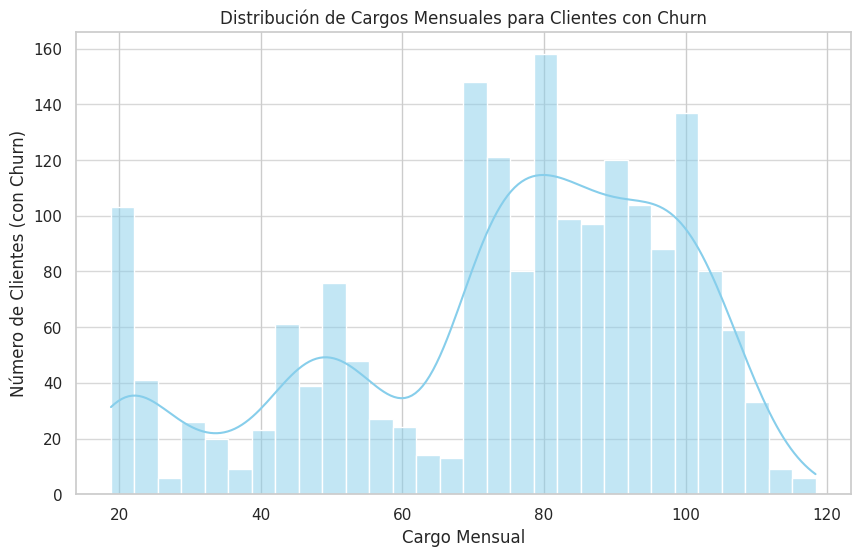

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json

# --- 1. Definir URL y Carga de Datos con Manejo de Errores ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status() # Lanza un HTTPError para malas respuestas (4xx o 5xx)
    data = json.loads(response.text) # Parsear el contenido JSON
    df_raw = pd.DataFrame(data) # Usamos df_raw para el DataFrame inicial
except requests.exceptions.RequestException as e:
    print(f"Error al obtener datos de la URL: {e}")
    exit() # Salir si los datos no se pueden obtener
except json.JSONDecodeError as e:
    print(f"Error al decodificar JSON: {e}")
    exit() # Salir si el JSON es inválido

# --- 2. Normalizar Columnas Anidadas de forma robusta y limpiar ---
df_clean = df_raw.copy()

# Normalizar 'customer'
if 'customer' in df_clean.columns:
    df_customer = pd.json_normalize(df_clean['customer'])
    df_customer = df_customer.rename(columns={
        'género': 'gender',
        'duración': 'tenure'
    })
    if 'tenure' in df_customer.columns and 'duración' in df_customer.columns:
        df_customer['tenure'] = df_customer['tenure'].fillna(df_customer['duración'])
        df_customer = df_customer.drop(columns=['duración'])
    df_clean = pd.concat([df_clean.drop('customer', axis=1), df_customer.add_prefix('customer.')], axis=1)

# Normalizar 'phone'
if 'phone' in df_clean.columns:
    df_phone = pd.json_normalize(df_clean['phone'])
    df_phone = df_phone.rename(columns={
        'Servicio Telefónico': 'PhoneService',
        'Líneas Múltiples': 'MultipleLines'
    })
    df_clean = pd.concat([df_clean.drop('phone', axis=1), df_phone.add_prefix('phone.')], axis=1)

# Normalizar 'internet'
if 'internet' in df_clean.columns:
    df_internet = pd.json_normalize(df_clean['internet'])
    df_internet = df_internet.rename(columns={
        'Servicio de Internet': 'InternetService',
        'Seguridad en Línea': 'OnlineSecurity',
        'Copia de Seguridad en Línea': 'OnlineBackup',
        'Protección del Dispositivo': 'DeviceProtection',
        'Soporte Técnico': 'TechSupport',
    })
    df_clean = pd.concat([df_clean.drop('internet', axis=1), df_internet.add_prefix('internet.')], axis=1)

# Normalizar 'account'
if 'account' in df_clean.columns:
    df_account = pd.json_normalize(df_clean['account'])
    df_account = df_account.rename(columns={
        'Contrato': 'Contract',
        'Facturación Electrónica': 'PaperlessBilling',
        'Facturación sin papel': 'PaperlessBilling',
        'Método de Pago': 'PaymentMethod',
        'Cargos.Mensual': 'Charges.Monthly',
        'Cargos.Total': 'Charges.Total'
    })
    df_clean = pd.concat([df_clean.drop('account', axis=1), df_account], axis=1)


# --- Limpieza y unificación final de columnas ---

# Mapear 'Churn' a numérico (0=No, 1=Sí)
if 'Churn' in df_clean.columns:
    df_clean.loc[:, 'Churn'] = df_clean['Churn'].replace({'No ': 'No'})
    df_clean.loc[:, 'Churn_numeric'] = df_clean['Churn'].map({'Yes': 1, 'Sí': 1, 'No': 0})
    df_clean.loc[:, 'Churn_numeric'] = pd.to_numeric(df_clean['Churn_numeric'], errors='coerce')
    df_clean = df_clean.dropna(subset=['Churn_numeric']).copy()
    df_clean.loc[:, 'Churn_numeric'] = df_clean['Churn_numeric'].astype(int)
else:
    print("Advertencia: La columna 'Churn' no se encontró. No se puede usar para la segmentación.")
    df_clean.loc[:, 'Churn_numeric'] = 0

# Unificar la columna de género (customer.gender)
if 'customer.gender' in df_clean.columns:
    df_clean.loc[:, 'customer.gender'] = df_clean['customer.gender'].replace({
        'Mujer': 'Femenino',
        'Female': 'Femenino',
        'Hombre': 'Masculino',
        'Male': 'Masculino'
    })
    df_clean.loc[:, 'customer.gender'] = df_clean['customer.gender'].fillna('Desconocido')
else:
    print("Advertencia: La columna 'customer.gender' no se encontró.")
    df_clean.loc[:, 'customer.gender'] = 'Desconocido'

# Convertir columnas numéricas a tipo adecuado
numeric_cols_to_convert = ['customer.tenure', 'Charges.Monthly', 'Charges.Total', 'customer.SeniorCitizen']
for col in numeric_cols_to_convert:
    if col in df_clean.columns:
        if col == 'Charges.Total':
            df_clean.loc[:, col] = df_clean[col].replace(' ', np.nan)
        df_clean.loc[:, col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean = df_clean.dropna(subset=[col]).copy()


print("--- Primeras filas del DataFrame limpio y normalizado ---")
print(df_clean.head().to_markdown(index=False, numalign="left", stralign="left"))


# --- 3. Generar el Histograma de Charges.Monthly para clientes con Churn ---

# Asegurarse de que las columnas existan
required_cols_for_histogram = ['Charges.Monthly', 'Churn_numeric']

if all(col in df_clean.columns for col in required_cols_for_histogram):
    # Filtrar el DataFrame para obtener solo los clientes que han hecho Churn (Churn_numeric = 1)
    df_churned = df_clean[df_clean['Churn_numeric'] == 1].copy()

    if not df_churned.empty:
        plt.figure(figsize=(10, 6))
        # Creamos un histograma de 'Charges.Monthly' solo para el DataFrame filtrado
        sns.histplot(data=df_churned, x='Charges.Monthly', bins=30, kde=True, color='skyblue') # Ajusta bins y color si es necesario
        plt.title('Distribución de Cargos Mensuales para Clientes con Churn')
        plt.xlabel('Cargo Mensual')
        plt.ylabel('Número de Clientes (con Churn)')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print("\nNo hay clientes con Churn (Churn_numeric = 1) para generar el histograma.")
else:
    print(f"\n¡ATENCIÓN! El histograma no se pudo generar porque una o más de las columnas necesarias NO EXISTEN en el DataFrame final con los nombres esperados.")
    print(f"Columnas requeridas: {required_cols_for_histogram}")
    print(f"Columnas disponibles: {df_clean.columns.tolist()}")



--- Mapa de Calor de Correlación Categórica ---


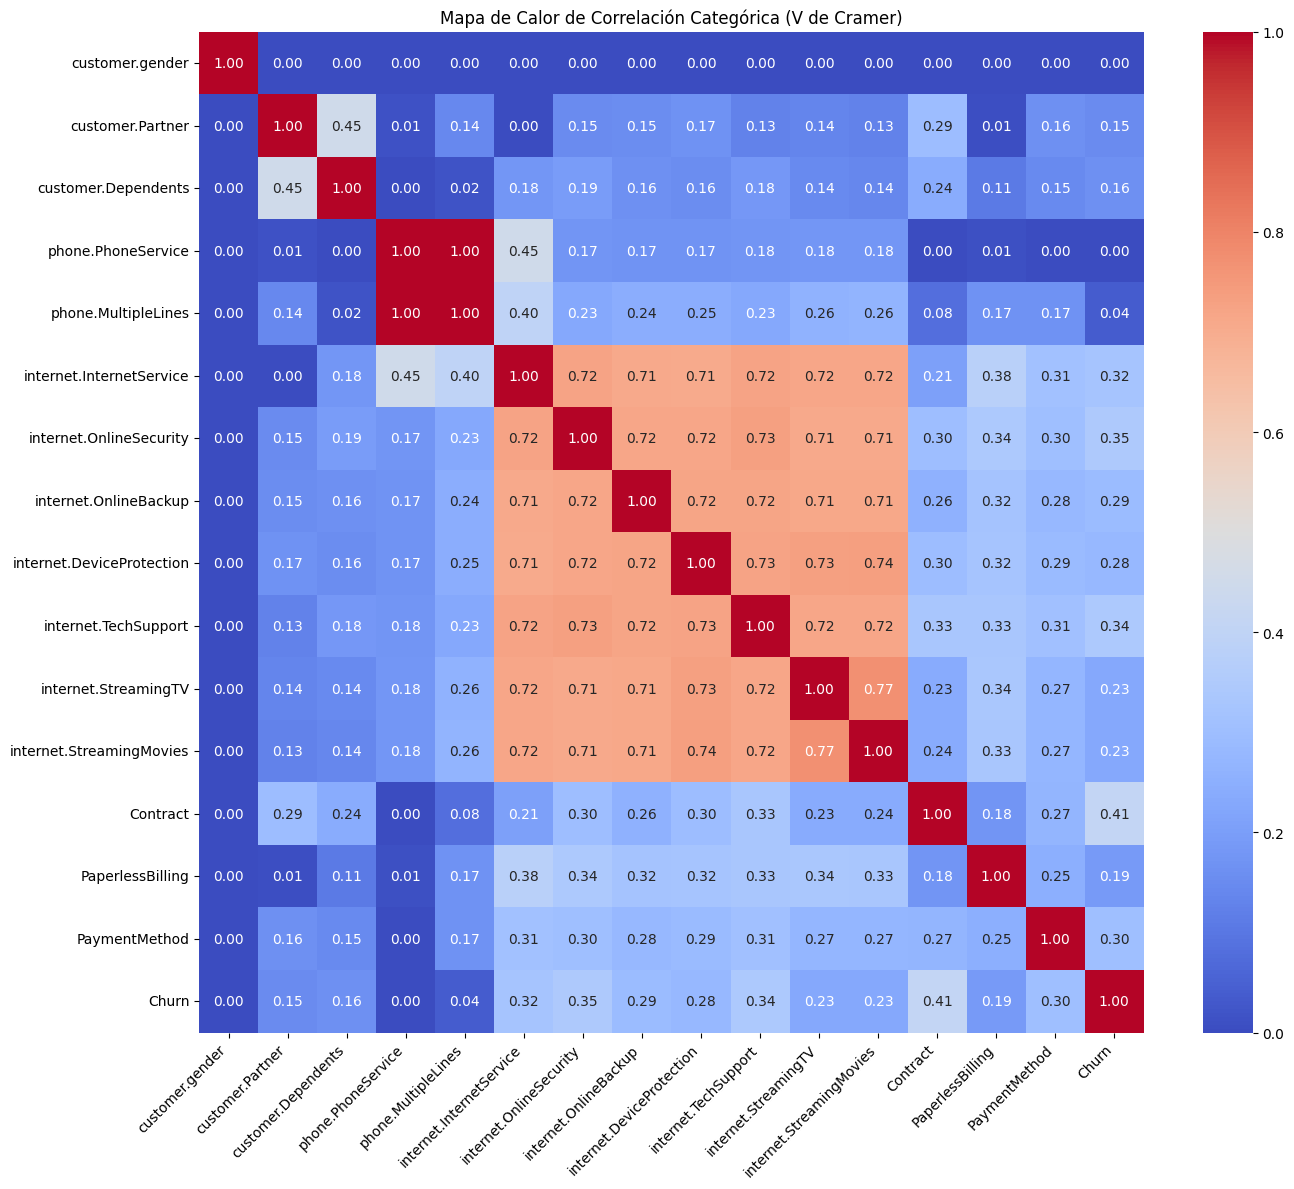

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
from scipy.stats import chi2_contingency  # Para V de Cramer

# --- 1. Carga de datos desde JSON remoto ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status()
    data = json.loads(response.text)
    df_raw = pd.DataFrame(data)
except requests.exceptions.RequestException as e:
    print(f"Error al obtener datos de la URL: {e}")
    exit()
except json.JSONDecodeError as e:
    print(f"Error al decodificar JSON: {e}")
    exit()

# --- 2. Normalización de columnas anidadas ---
df_clean = df_raw.copy()

# Normalizar 'customer'
if 'customer' in df_clean.columns:
    df_customer = pd.json_normalize(df_clean['customer'])
    df_customer = df_customer.rename(columns={
        'género': 'gender',
        'duración': 'tenure'
    })
    if 'tenure' in df_customer.columns and 'duración' in df_customer.columns:
        df_customer['tenure'] = df_customer['tenure'].fillna(df_customer['duración'])
        df_customer = df_customer.drop(columns=['duración'])
    df_clean = pd.concat([df_clean.drop('customer', axis=1), df_customer.add_prefix('customer.')], axis=1)

# Normalizar 'phone'
if 'phone' in df_clean.columns:
    df_phone = pd.json_normalize(df_clean['phone'])
    df_phone = df_phone.rename(columns={
        'Servicio Telefónico': 'PhoneService',
        'Líneas Múltiples': 'MultipleLines'
    })
    df_clean = pd.concat([df_clean.drop('phone', axis=1), df_phone.add_prefix('phone.')], axis=1)

# Normalizar 'internet'
if 'internet' in df_clean.columns:
    df_internet = pd.json_normalize(df_clean['internet'])
    df_internet = df_internet.rename(columns={
        'Servicio de Internet': 'InternetService',
        'Seguridad en Línea': 'OnlineSecurity',
        'Copia de Seguridad en Línea': 'OnlineBackup',
        'Protección del Dispositivo': 'DeviceProtection',
        'Soporte Técnico': 'TechSupport',
    })
    df_clean = pd.concat([df_clean.drop('internet', axis=1), df_internet.add_prefix('internet.')], axis=1)

# Normalizar 'account'
if 'account' in df_clean.columns:
    df_account = pd.json_normalize(df_clean['account'])
    df_account = df_account.rename(columns={
        'Contrato': 'Contract',
        'Facturación Electrónica': 'PaperlessBilling',
        'Facturación sin papel': 'PaperlessBilling',
        'Método de Pago': 'PaymentMethod',
        'Cargos.Mensual': 'Charges.Monthly',
        'Cargos.Total': 'Charges.Total'
    })
    df_clean = pd.concat([df_clean.drop('account', axis=1), df_account], axis=1)

# --- 3. Limpieza y estandarización de columnas ---
# Churn
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].replace({'No ': 'No'})
    df_clean['Churn_numeric'] = df_clean['Churn'].map({'Yes': 1, 'Sí': 1, 'No': 0})
    df_clean['Churn_numeric'] = pd.to_numeric(df_clean['Churn_numeric'], errors='coerce')
    df_clean = df_clean.dropna(subset=['Churn_numeric']).copy()
    df_clean['Churn_numeric'] = df_clean['Churn_numeric'].astype(int)
else:
    print("Advertencia: La columna 'Churn' no se encontró.")
    df_clean['Churn_numeric'] = 0

# Género
if 'customer.gender' in df_clean.columns:
    df_clean['customer.gender'] = df_clean['customer.gender'].replace({
        'Mujer': 'Femenino',
        'Female': 'Femenino',
        'Hombre': 'Masculino',
        'Male': 'Masculino'
    }).fillna('Desconocido')
else:
    print("Advertencia: La columna 'customer.gender' no se encontró.")
    df_clean['customer.gender'] = 'Desconocido'

# Conversión de columnas numéricas
numeric_cols = ['customer.tenure', 'Charges.Monthly', 'Charges.Total', 'customer.SeniorCitizen']
for col in numeric_cols:
    if col in df_clean.columns:
        if col == 'Charges.Total':
            df_clean[col] = df_clean[col].replace(' ', np.nan)
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean = df_clean.dropna(subset=[col])

# --- 4. Función para calcular la V de Cramer ---
def cramers_v(x, y):
    idx = x.notna() & y.notna()
    x = x[idx]
    y = y[idx]

    if x.empty or y.empty:
        return np.nan

    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.empty or min(confusion_matrix.shape) == 1:
        return 0.0

    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    denominator = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denominator) if denominator > 0 else 0.0

# --- 5. Mapa de calor de correlación categórica (V de Cramer) ---
print("\n--- Mapa de Calor de Correlación Categórica ---")

categorical_features = [
    col for col in df_clean.columns
    if df_clean[col].dtype == 'object' and col not in ['customerID', 'Churn']
]

cat_cols_for_cramer = categorical_features + ['Churn'] if 'Churn' in df_clean.columns else categorical_features + ['Churn_numeric']
cat_cols_for_cramer = [col for col in cat_cols_for_cramer if col in df_clean.columns]

if len(cat_cols_for_cramer) > 1:
    cramer_matrix = pd.DataFrame(index=cat_cols_for_cramer, columns=cat_cols_for_cramer, dtype=float)
    for col1 in cat_cols_for_cramer:
        for col2 in cat_cols_for_cramer:
            cramer_matrix.loc[col1, col2] = cramers_v(df_clean[col1], df_clean[col2])

    plt.figure(figsize=(14, 12))
    sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
    plt.title('Mapa de Calor de Correlación Categórica (V de Cramer)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas categóricas para generar el mapa de calor.")


#📄Informe final

El análisis del comportamiento de los usuarios revela que las tasas de abandono del servicio (churn) siguen patrones definidos, influenciados por factores concretos que interactúan de forma predecible. La pérdida de clientes no es aleatoria, sino que suele originarse por una combinación de elementos como contratos de corta duración, ausencia de servicios digitales claves y métodos de pago poco eficientes, lo cual genera un entorno propenso al abandono.

Uno de los hallazgos más relevantes es el efecto positivo de los contratos a largo plazo. Los clientes con compromisos anuales o bianuales presentan niveles de abandono considerablemente más bajos (por debajo del 10%), independientemente de otros factores. Esta estabilidad se ve reforzada cuando los usuarios también contratan servicios como soporte técnico y seguridad digital. En contraste, quienes tienen contratos mensuales y carecen de estos servicios muestran tasas de abandono elevadas, llegando a superar el 40% en ciertos grupos.

El análisis también evidencia variaciones relevantes según el perfil demográfico. Por ejemplo, los clientes mayores, aunque son una minoría, tienden a abandonar el servicio durante sus primeros doce meses, pero muestran una notable fidelidad si superan ese período inicial. Esto indica la necesidad de adaptar las estrategias de retención a este grupo específico, enfocándose en brindar mayor acompañamiento y confianza durante su primer año como clientes.

Con la información de clientes ya depurada, realizamos un análisis para entender qué impulsa la cancelación del servicio. Un dato clave es que uno de cada cuatro clientes termina abandonando.

Vemos patrones claros en las categorías: los clientes con contratos mensuales son los más propensos a irse, y lo mismo ocurre con aquellos que no tienen servicios extra. Sorprendentemente, quienes optan por pagos electrónicos o automáticos tienden a quedarse más tiempo.

Al observar los números, notamos que la antigüedad es clave: cuanto más tiempo lleva un cliente con nosotros, menos probable es que se vaya. Sin embargo, un cargo mensual elevado y tener pocos servicios son señales de alerta que preceden a una mayor tasa de abandono. De hecho, la duración del contrato (meses_contrato) es el factor que más fuertemente predice que un cliente no cancelará, mientras que la cantidad de servicios y el cargo mensual también tienen un peso considerable en este comportamiento.

Como forma de psoibles soluciones puedo dar como recomendaciones:

1. Fomento de planes anuales: Ofrecer incentivos o descuentos para motivar a los clientes a cambiar sus planes mensuales por contratos anuales.

2. Retención desde el inicio: Desarrollar programas de bienvenida y beneficios específicos dirigidos a nuevos clientes con menos de un año de antigüedad.

3. Promoción de servicios combinados: Impulsar la venta de paquetes que incluyen varios servicios (como seguridad en línea y soporte técnico), especialmente con tarifas reducidas en aviones anuales. Incluir pruebas gratuitas para atraer nuevos usuarios.

4. Mejora de las formas de pago: Reduzca el uso de pagos por cheque electrónico y promueva opciones automáticas. Ofrecer beneficios a quienes pasan de facturación en papel a pagos electrónicos automáticos, especialmente en contratos mensuales.

5. Atención al segmento premium: Estudiar a los clientes con servicios de fibra óptica y altos cargos para identificar oportunidades de mejora en la experiencia o comunicación del valor. Crear un programa exclusivo para el grupo con mayor valor de vida del cliente (CLV).

6. Fidelización anticipada: Diseñar un programa específico para adultos mayores en sus primeros meses como clientes, con recompensas por mantener activos a los 3, 6 y 12 meses.

7. Monitoreo preventivo: Realizar evaluaciones regulares del servicio para identificar a tiempo señales de posibles cancelaciones o insatisfacción del cliente.